<a href="https://colab.research.google.com/github/sowmiyagunal04-dev/amazon-financial-analysis-2021-2024/blob/scripts/amazon_financials_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls


sample_data



--- Amazon Financial Data (2021–2024) ---

                             Metric        2021        2022        2023         2024                              Source
                Revenue (Net Sales) 469,822,000 513,983,000 574,785,000  637,959,000    Income Statement (Yahoo Finance)
                    Cost of Revenue 272,344,000 288,831,000 304,739,000  326,288,000    Income Statement (Yahoo Finance)
                       Gross Profit 197,478,000 225,152,000 270,046,000  311,671,000    Income Statement (Yahoo Finance)
            Operating Income (EBIT)  24,879,000  12,248,000  36,852,000   68,593,000    Income Statement (Yahoo Finance)
                         Net Income  33,364,000  30,425,000  59,248,000   70,623,000    Income Statement (Yahoo Finance)
               Total Current Assets 161,580,000 146,791,000 172,351,000  190,867,000       Balance Sheet (Yahoo Finance)
          Total Current Liabilities 142,266,000 155,393,000 164,917,000  179,431,000       Balance Sheet (Yah

/tmp/ipython-input-1344581006.py:61: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['469,822,000' '272,344,000' '197,478,000' '24,879,000' '33,364,000'
 '161,580,000' '142,266,000' '420,549,000' '282,304,000' '138,245,000'
 '46,327,000' '-58,154,000' '6,291,000']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  display_df.loc[mask, col] = display_df.loc[mask, col].apply(lambda x: f"{int(x):,}" if pd.notna(x) else x)
/tmp/ipython-input-1344581006.py:61: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['513,983,000' '288,831,000' '225,152,000' '12,248,000' '30,425,000'
 '146,791,000' '155,393,000' '462,675,000' '316,632,000' '146,043,000'
 '84,946,000' '-59,344,000' '-15,879,000']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  display_df.lo

,2021,2022,2023,2024
Metric,,,,
Gross Profit Margin (%),42.03,43.81,47.00,48.85
Operating Margin (%),5.30,2.38,6.41,10.76
Net Profit Margin (%),7.10,5.92,10.31,11.07
Current Ratio,1.14,0.94,1.04,1.06
Debt-to-Equity,2.04,2.17,1.61,1.19
Return on Assets (ROA %),7.90,6.58,11.22,11.30
Return on Equity (ROE %),24.10,20.84,29.35,24.69
Return on Capital Employed (ROCE %),6.90,3.99,10.16,15.40


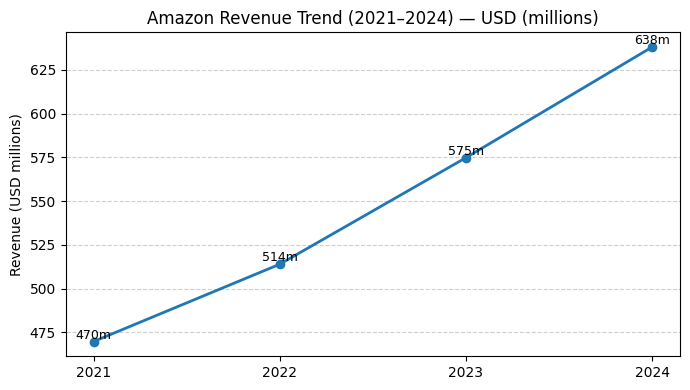

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# 1. Define Amazon financial data
data = {
    "Metric": [
        "Revenue (Net Sales)", "Cost of Revenue", "Gross Profit", "Operating Income (EBIT)",
        "Net Income", "Total Current Assets", "Total Current Liabilities", "Total Assets",
        "Total Liabilities", "Shareholders’ Equity", "Operating Cash Flow",
        "Investing Cash Flow", "Financing Cash Flow", "Gross Profit Margin (%)",
        "Operating Margin (%)", "Net Profit Margin (%)", "Revenue Growth (%)",
        "Current Ratio", "Debt-to-Equity", "Asset Turnover", "Return on Assets (ROA %)",
        "Return on Equity (ROE %)", "Return on Capital Employed (ROCE %)"
    ],
    "2021": [
        469_822_000, 272_344_000, 197_478_000, 24_879_000, 33_364_000,
        161_580_000, 142_266_000, 420_549_000, 282_304_000, 138_245_000,
        46_327_000, -58_154_000, 6_291_000, 42.03, 5.30, 7.10, np.nan,
        1.14, 2.04, 1.12, 7.90, 24.10, 6.90
    ],
    "2022": [
        513_983_000, 288_831_000, 225_152_000, 12_248_000, 30_425_000,
        146_791_000, 155_393_000, 462_675_000, 316_632_000, 146_043_000,
        84_946_000, -59_344_000, -15_879_000, 43.81, 2.38, 5.92, 9.40,
        0.94, 2.17, 1.11, 6.58, 20.84, 3.99
    ],
    "2023": [
        574_785_000, 304_739_000, 270_046_000, 36_852_000, 59_248_000,
        172_351_000, 164_917_000, 527_854_000, 325_979_000, 201_875_000,
        115_877_000, -83_342_000, -11_812_000, 47.00, 6.41, 10.31, 11.83,
        1.04, 1.61, 1.09, 11.22, 29.35, 10.16
    ],
    "2024": [
        637_959_000, 326_288_000, 311_671_000, 68_593_000, 70_623_000,
        190_867_000, 179_431_000, 624_894_000, 338_924_000, 285_970_000,
        121_137_000, -123_569_000, -8_662_000, 48.85, 10.76, 11.07, 10.99,
        1.06, 1.19, 1.02, 11.30, 24.69, 15.40
    ],
    "Source": [
        "Income Statement (Yahoo Finance)", "Income Statement (Yahoo Finance)",
        "Income Statement (Yahoo Finance)", "Income Statement (Yahoo Finance)",
        "Income Statement (Yahoo Finance)", "Balance Sheet (Yahoo Finance)",
        "Balance Sheet (Yahoo Finance)", "Balance Sheet (Yahoo Finance)",
        "Balance Sheet (Yahoo Finance)", "Balance Sheet (Yahoo Finance)",
        "Cash Flow Statement (Yahoo Finance)", "Cash Flow Statement (Yahoo Finance)",
        "Cash Flow Statement (Yahoo Finance)", "Derived", "Derived", "Derived",
        "Derived", "Derived", "Derived", "Derived", "Derived", "Derived", "Derived"
    ]
}

amazon_df = pd.DataFrame(data)

# 2. Helper functions and analysis
def display_table(df: pd.DataFrame, nrows: int = 999):
    """Nicely display a subset of the DataFrame (for Colab)."""
    display_df = df.copy()
    # Format large numbers with comma separators for readability
    for col in ["2021","2022","2023","2024"]:
        # Only format integer-like metrics
        mask = display_df[col].apply(lambda x: isinstance(x, (int, np.integer)) or (isinstance(x, float) and x.is_integer()))
        display_df.loc[mask, col] = display_df.loc[mask, col].apply(lambda x: f"{int(x):,}" if pd.notna(x) else x)
        # Leave percentages as-is
    # Show all rows (or up to nrows)
    pd.set_option('display.max_rows', nrows)
    print("\n--- Amazon Financial Data (2021–2024) ---\n")
    print(display_df.to_string(index=False))
    print("\n(Values in USD; large numbers shown with commas)\n")

def calculate_revenue_growth(df: pd.DataFrame):
    """Prints YoY revenue growth (%)"""
    rev = df.loc[df["Metric"] == "Revenue (Net Sales)", ["2021","2022","2023","2024"]].iloc[0].astype(float)
    # compute percent changes
    growth_22 = (rev["2022"] - rev["2021"]) / rev["2021"] * 100
    growth_23 = (rev["2023"] - rev["2022"]) / rev["2022"] * 100
    growth_24 = (rev["2024"] - rev["2023"]) / rev["2023"] * 100
    print(f"Revenue (YoY %): 2022 = {growth_22:.2f}%, 2023 = {growth_23:.2f}%, 2024 = {growth_24:.2f}%")

def plot_revenue_trend(df: pd.DataFrame, show_values=True):
    """Plot revenue trend in millions (for readability)."""
    years = ["2021","2022","2023","2024"]
    revenue = df.loc[df["Metric"] == "Revenue (Net Sales)", years].iloc[0].astype(float) / 1_000_000  # convert to millions
    plt.figure(figsize=(7,4))
    plt.plot(years, revenue, marker='o', linewidth=2)
    if show_values:
        for x,y in zip(years, revenue):
            plt.text(x, y, f"{y:.0f}m", ha='center', va='bottom', fontsize=9)
    plt.title("Amazon Revenue Trend (2021–2024) — USD (millions)")
    plt.ylabel("Revenue (USD millions)")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

def quick_ratios_summary(df: pd.DataFrame):
    """Print a short, focused ratios summary (profitability, liquidity, leverage, returns)."""
    rows = ["Gross Profit Margin (%)","Operating Margin (%)","Net Profit Margin (%)",
            "Current Ratio","Debt-to-Equity","Return on Assets (ROA %)",
            "Return on Equity (ROE %)","Return on Capital Employed (ROCE %)"]
    subset = df[df["Metric"].isin(rows)].set_index("Metric")
    print("\n--- Key Ratios (2021–2024) ---\n")
    # format percentages nicely
    display(subset[["2021","2022","2023","2024"]])

def main():
    # Display table and summaries
    display_table(amazon_df)
    calculate_revenue_growth(amazon_df)
    quick_ratios_summary(amazon_df)
    plot_revenue_trend(amazon_df)

# Ensure the module can be imported without auto-execution,
# but will auto-run when executed directly with %run or `python`.
if __name__ == "__main__":
    main()
